In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn import linear_model
import statsmodels.api as sm
import seaborn as sns

# 1. (40%) Decision Tree Algorithms

In [ ]:
# Dataset
path = "./MDS_Assignment3_SECOM.xlsx"
df = pd.read_excel(path, sheet_name="secom", index_col=0)

unique_dict : 用來存出現過的 col content

duplicate_col : 用來存重複出現的 col name

temp_list : 將某一 col 讀取進來處理，先把 nan 替換成 -1 (這樣才能做comparison)，再將他轉換成 list 儲存

處理流程 : 

1. 如果第一次出現的 col content 就放進 unique_dict

2. 如果已經出現過的 col content 就用出現過的 col name 當作 key, 重複出現的 col name 當作 value 存進 duplicate_col


# 1-(a) (5%) Construct a data science framework and show the data summary

In [ ]:
df

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label,Time
1,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,19/07/2008 11:55:00
2,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,19/07/2008 12:32:00
3,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,19/07/2008 13:17:00
4,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 14:43:00
5,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 15:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1,16/10/2008 15:13:00
1564,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1,16/10/2008 20:49:00
1565,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1,17/10/2008 05:26:00
1566,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1,17/10/2008 06:01:00


In [ ]:
df.describe()

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,...,Sensor_582,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


I use the describe() function to get the data summary like "count", "mean", "std", "min", "max"...... this kind of the most often statistical data

# 1-(b) (5%) What is the problem about the dataset? Any identical column? Any redundant column? Any missing value? How to handle these issues?

In [ ]:
# Any identical column ?
cols = df.columns
cols_set = set(cols)
print("Raw data:", len(cols))
print("Set data:", len(cols_set))

Raw data: 592
Set data: 592


### Any identical column ?

首先，我們先定義 "identical column" 代表相同的 column name，因為我認為相同的 column content 應該屬於下面的 "redundant column"

我透過 set 這個資料結構的特性來檢查是否有任何相同的 column name.

由上面的結果可知，將 Column name 作為 raw data 放進 set 之後，數量沒有變化，所以可以確定沒有相同的 Column name

因為沒有任何相同名字的 column name，所以不用額外處理

In [ ]:
# Any redundant column ?
def get_keys_from_value(d, val):
  return [k for k, v in d.items() if v == val]

### clear the same column content ###
unique_dict = {}
duplicate_col = {}
cols = df.columns
for col in cols:
  temp_list = list(df[col].replace(np.nan, -1).values)
  if temp_list not in list(unique_dict.values()):
    unique_dict[col] = temp_list
  else:
    key = get_keys_from_value(unique_dict, temp_list)[0]
    if key in duplicate_col: 
      duplicate_col[key].append(col)
    else:
      duplicate_col[key] = [col]
print("Criteria 1: clear the same column content")
print("Num of unique column content:", len(unique_dict))
print("Num of same columna content:", len(cols) - len(unique_dict))
print("Same column content:", duplicate_col, "\n")

### clear the col that all content are identical
clear_data = {}
for key in unique_dict:
  num_of_set = len(set(unique_dict[key]))
  if num_of_set > 2 or key == "Label": # because we change the NaN to -1, so it may have two element like "100 & -1" but actually it only have 100
    clear_data[key] = unique_dict[key]
print("Criteria 2: clear the col that all content are identical")
print("Num of clear data:", len(clear_data))
print("Num of all content are identical:", len(unique_dict) - len(clear_data), "\n")

print("Num of redundant data:", len(cols) - len(clear_data))

Criteria 1: clear the same column content
Num of unique column content: 488
Num of same columna content: 104
Same column content: {'Sensor_14': ['Sensor_150', 'Sensor_285', 'Sensor_423'], 'Sensor_53': ['Sensor_180', 'Sensor_187', 'Sensor_190', 'Sensor_316', 'Sensor_323', 'Sensor_326', 'Sensor_452', 'Sensor_459', 'Sensor_462'], 'Sensor_191': ['Sensor_192', 'Sensor_193', 'Sensor_194', 'Sensor_195', 'Sensor_327', 'Sensor_328', 'Sensor_329', 'Sensor_330', 'Sensor_331', 'Sensor_463', 'Sensor_464', 'Sensor_465', 'Sensor_466', 'Sensor_467'], 'Sensor_98': ['Sensor_227', 'Sensor_230', 'Sensor_231', 'Sensor_232', 'Sensor_233', 'Sensor_234', 'Sensor_235', 'Sensor_236', 'Sensor_237', 'Sensor_238', 'Sensor_241', 'Sensor_242', 'Sensor_243', 'Sensor_244', 'Sensor_365', 'Sensor_370', 'Sensor_371', 'Sensor_372', 'Sensor_373', 'Sensor_374', 'Sensor_375', 'Sensor_376', 'Sensor_379', 'Sensor_380', 'Sensor_381', 'Sensor_382', 'Sensor_499', 'Sensor_502', 'Sensor_503', 'Sensor_504', 'Sensor_505', 'Sensor_506

### Any redundant column ?

首先，我先定義何謂 "redundant column"，根據以下兩個準則 :

1. 如果有 2 個或 2 個以上的 column，他們所有的 content 都相同，那我們就只會保留其中一個 column，因為其他 column 不會給予我們更多的資訊，因此他們是 redundant column

2. 如果單一 column 中的所有值都相同，那我們也視為 redundant column，因為他沒有任何變異，也就代表沒有資訊量

根據這兩個準則，我們可以產出上面的結果，得知總共有 116 個 "redundant column"

Detail Note:

Criteria 1:

> unique_dict : 用來存出現過的 col content

> duplicate_col : 用來存重複出現的 col name，key 代表保留的 col name, value 代表與此 col 有相同 content 的 col name

> temp_list : 將某一 col 讀取進來處理，先把 nan 替換成 -1 (這樣才能做comparison)，再將他轉換成 list 儲存

> 處理流程 :

> 如果第一次出現的 col content 就放進 unique_dict

> 如果已經出現過的 col content 就用出現過的 col name 當作 key, 重複出現的 col name 當作 value 存進 duplicate_col

Criteria 2:

> 將資料放進 set 中確認個數，如果只有單一元素即代表他所有 content 都相同，因此屬於 "redundant column"

我認為所謂的 redundant column 可以試著直接拿掉再來訓練模型，因為這些資料可能無法提供更多的資訊量。


In [ ]:
# Any missing value?
df.isnull().sum()

Sensor_1       6
Sensor_2       7
Sensor_3      14
Sensor_4      14
Sensor_5      14
              ..
Sensor_588     1
Sensor_589     1
Sensor_590     1
Label          0
Time           0
Length: 592, dtype: int64

### Any missing value?

由上述的結果可知，這個資料集中有少部分的 missing value

我們可以選擇把這些 Missing value 相關的 row 拿掉，或是填入平均值、中位數、眾數，或是乾脆直接填入-1讓模型仍可以知道這裡有一個異常狀況，

如果有時間順序，也能用最近的一筆資料(前一筆或後一筆)當作 missing value

# 1-(c) (5%) After data preprocessing, based on the prepared dataset, use the classification and regression tree (CART) to analyze the prepared dataset. Show the classification results by 10-fold cross validation with several metrics (eg. accuracy, area under ROC curve (AUC), and F1-score), and also list the hyperparameters you adjust.

In [ ]:
col_names = list(clear_data.keys())
clear_df = df[col_names]
clear_df = clear_df.fillna(method="pad", axis=0)
clear_df = clear_df.fillna(method="backfill", axis=0)
clear_df

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_11,...,Sensor_583,Sensor_584,Sensor_585,Sensor_586,Sensor_587,Sensor_588,Sensor_589,Sensor_590,Label,Time
1,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,0.5005,0.0118,0.0035,2.3630,0.0096,0.0201,0.0060,208.2045,-1,19/07/2008 11:55:00
2,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,19/07/2008 12:32:00
3,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,19/07/2008 13:17:00
4,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 14:43:00
5,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 15:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,-0.0057,...,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1,16/10/2008 15:13:00
1564,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,-0.0093,...,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1,16/10/2008 20:49:00
1565,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,1.4333,-0.0061,-0.0093,...,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1,17/10/2008 05:26:00
1566,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,0.0032,...,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1,17/10/2008 06:01:00


因為這個資料集是 product line 的資料集，且從欄位中可以看出時間順序，所以我採用填補"最近"的資料來處理 missing value

Note:

基本上就是用上一筆資料來填補 missing value，只有第一筆資料是用下一筆資料來填補，因為她沒有上一筆

In [ ]:
x = clear_df.drop(["Label", "Time"], axis=1)
y = clear_df["Label"]
split_rate = 0.9
split_point = round(len(x)*split_rate)

### 因為有時間序列，所以照著時間切割 ###
x_train = x[0: split_point]
x_test = x[split_point:]
y_train = y[0: split_point]
y_test = y[split_point:]

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [ ]:
from sklearn.model_selection import cross_val_score

accu_scores = cross_val_score(clf, x_train, y_train, cv=10)
f1_scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='f1')
print("Accuracy metrics:", accu_scores)
print("F1 Metrics:", f1_scores)

Accuracy metrics: [0.63120567 0.62411348 0.74468085 0.85815603 0.87943262 0.75886525
 0.84397163 0.87943262 0.86524823 0.88652482]
F1 Metrics: [0.17391304 0.0754717  0.09090909 0.09090909 0.125      0.13333333
 0.         0.08       0.         0.        ]


這部分是題目要求的 Accuracy 和 F1 Score，因為用 10-fold 所以會有多個數值

若是只想要一個數值也可以取平均

In [ ]:
cross_val_score(clf, x_train, y_train, cv=10, scoring='precision')

array([0.14035088, 0.09090909, 0.07407407, 0.        , 0.        ,
       0.04545455, 0.06666667, 0.125     , 0.14285714, 0.28571429])

In [ ]:
cross_val_score(clf, x_train, y_train, cv=10, scoring='recall')

array([0.7       , 0.3       , 0.2       , 0.        , 0.        ,
       0.1       , 0.1       , 0.1       , 0.        , 0.09090909])

這部分是我額外做的分析，從 recall 中可以看出在部分情況下 recall = 0，這常常發生在 data imbalance 的情況下，也就是此資料集的 label 可能不太平衡

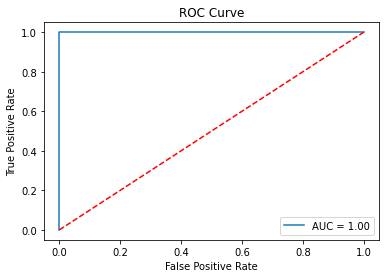

In [ ]:
from sklearn.metrics import auc,roc_auc_score,roc_curve,recall_score,f1_score
y_pred = clf.predict(x_train)
# Compute ROC metrics:
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
# Get AUC:
roc_auc = auc(fpr,tpr)

# Plot ROC:
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

這個部分是 training data 的 ROC & AUC，可以看出預設的有點過於準確了，可能有 overfitting 的情形，這樣在 testing 中不一定會有成績

另外一個可能性就是前面提到的 data imbalance，因為答案過於集中在某一label，導致只要預測此類別準確度就會很高

In [ ]:
accu_scores = cross_val_score(clf, x_test, y_test, cv=10).mean()
f1_scores = cross_val_score(clf, x_test, y_test, cv=10, scoring='f1').mean()
recall_scores = cross_val_score(clf, x_test, y_test, cv=10, scoring='recall')
print("Accuracy mean:", accu_scores)
print("F1 mean:", f1_scores)
print("Recall mean:", recall_scores)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_

Accuracy mean: 0.975
F1 mean: 0.0
Recall mean: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


在這裡我直接將各項指標取平均，用以方便查看模型效能

這裡可以看出 recall == 0 造成 F1 score 變成 undefined，這常常是不平衡資料即會出現的現象

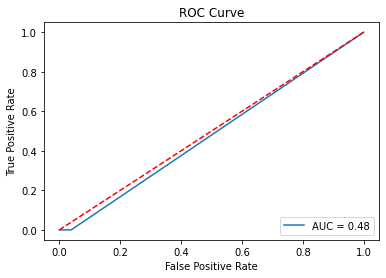

In [ ]:
from sklearn.metrics import auc,roc_auc_score,roc_curve,recall_score,f1_score
y_pred = clf.predict(x_test)
# Compute ROC metrics:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Get AUC:
roc_auc = auc(fpr,tpr)

# Plot ROC:
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

在 Testing 中果然 AUC 就下降至 0.48，由此可見這個 training 還存在一些問題要修正

In [ ]:
y_train.value_counts()

-1    1309
 1     101
Name: Label, dtype: int64

由此可看出-1、1的比例約為 13 : 1，我們可以嘗試調整 hyper-parameter "weight" 來改善模型

In [ ]:
weight = {-1:1, 1:13} 
clf = tree.DecisionTreeClassifier(class_weight=weight)
clf = clf.fit(x_train, y_train)

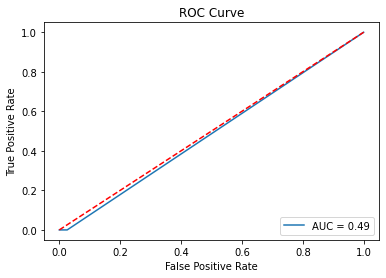

In [ ]:
y_pred = clf.predict(x_test)
# Compute ROC metrics:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Get AUC:
roc_auc = auc(fpr,tpr)

# Plot ROC:
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

調整 weight 之後的確有讓 testing AUC 提升，但仍沒有顯著提升

在此次實驗中我調整的 Hyper-parameter 只有 weight，因為目前只分析出 data imbalance 的部分，所以其他 Hyper-parameter 沒有改變

Ref: https://www.kaggle.com/code/kev8484/auc-0-97-cross-validated-f1-scores/notebook


# 1-(d) (5%) Suggest a method to address the data imbalance issue. Build a new balanced dataset. (hint: undersampling or oversampling)

In [ ]:
from imblearn.over_sampling import SMOTE
x_train_bal, y_train_bal = SMOTE(random_state=42).fit_resample(x_train, y_train)
y_train_bal.value_counts()

-1    1309
 1    1309
Name: Label, dtype: int64

在這裡我選擇使用 oversampling 中的 SMOTE(Synthetic Minority Oversampling Technique) 他有改善一些最基本 oversampling 的方式，通常效果會比較好

由上述結果可看出，現在兩種 label 的數量就相同了

# 1-(e) (5%) Based on the balanced dataset, use the classification and regression tree (CART) to analyze the balanced dataset. Show the classification results by 10-fold cross validation with several metrics (eg. accuracy, area under ROC curve (AUC), and F1-score), and also list the hyperparameters you adjust.

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train_bal, y_train_bal)

In [ ]:
accu_scores = cross_val_score(clf, x_test, y_test, cv=10).mean()
f1_scores = cross_val_score(clf, x_test, y_test, cv=10, scoring='f1').mean()
recall_scores = cross_val_score(clf, x_test, y_test, cv=10, scoring='recall')
print("Accuracy mean:", accu_scores)
print("F1 mean:", f1_scores)
print("Recall mean:", recall_scores)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_

Accuracy mean: 0.96875
F1 mean: 0.0
Recall mean: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


看起來 oversampling 仍然沒有解決問題，accuracy 下降至 0.96875，且 F1 score 的問題仍然沒有解決

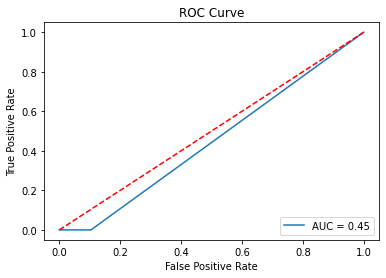

In [ ]:
y_pred = clf.predict(x_test)
# Compute ROC metrics:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Get AUC:
roc_auc = auc(fpr,tpr)

# Plot ROC:
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

我們用這個重新訓練的 model 來進行 testing，AUC 居然下降了，我去查了一些資料後發現雖然 oversampling 可以解決資料不平衡的問題，但有時候新增的資料可能不太符合原本的資料，導致預測結果下降。

所以其實 google 之後推崇的作法比較像是我一開始使用的調整"weight"，畢竟新產生的資料集不一定符合預期，但他們有另一套自己計算 weight 的方式，並非單純直接反比。

# 1-(f) (5%) Give a comparison between (c) and (e). Any suggestion or insight?

結合上述的兩種實驗(我自己多做了 weight 的調整)，可以得到以下的觀察:

1. oversampling 的方式不一定能夠解決 data imbalance 的問題，甚至可能使結果更糟糕，主要的原因可能是產生的資料不符合預期，讓 model 學習到錯誤的方向

2. 調整 weight 的方式似乎比較能解決 dara imbalance 的問題，但優化的幅度不高




# 1-(g) (5%) Use “Random Forest” to solve both prepared dataset and balanced dataset, respectively. Give a comparison and provide your insight.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
accu_scores = cross_val_score(clf, x_test, y_test, cv=10).mean()
f1_scores = cross_val_score(clf, x_test, y_test, cv=10, scoring='f1').mean()
recall_scores = cross_val_score(clf, x_test, y_test, cv=10, scoring='recall')
print("Accuracy mean:", accu_scores)
print("F1 mean:", f1_scores)
print("Recall mean:", recall_scores)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_

Accuracy mean: 0.98125
F1 mean: 0.0
Recall mean: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


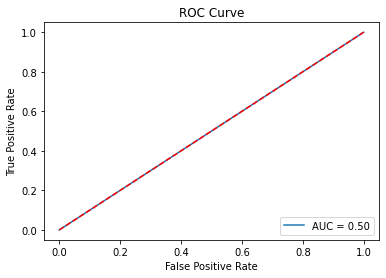

In [ ]:
y_pred = clf.predict(x_test)
# Compute ROC metrics:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Get AUC:
roc_auc = auc(fpr,tpr)

# Plot ROC:
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 上述的結果 For imbalance dataset

In [ ]:
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train_bal, y_train_bal)

RandomForestClassifier(random_state=0)

In [ ]:
accu_scores = cross_val_score(clf, x_test, y_test, cv=10).mean()
f1_scores = cross_val_score(clf, x_test, y_test, cv=10, scoring='f1').mean()
recall_scores = cross_val_score(clf, x_test, y_test, cv=10, scoring='recall')
print("Accuracy mean:", accu_scores)
print("F1 mean:", f1_scores)
print("Recall mean:", recall_scores)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_

Accuracy mean: 0.98125
F1 mean: 0.0
Recall mean: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


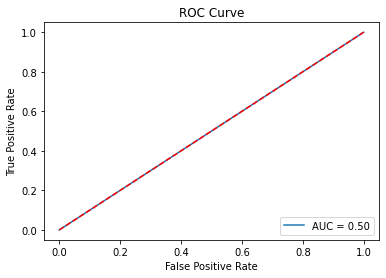

In [ ]:
y_pred = clf.predict(x_test)
# Compute ROC metrics:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Get AUC:
roc_auc = auc(fpr,tpr)

# Plot ROC:
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 上述的結果 For balance dataset

觀察此兩種結果，可發現不論是 accuracy、F1 score、AUC，這兩種實驗的分數都一樣，可能是 Random Forest 的能力比較強，不論 Data 是否不平衡，都能得出應有的成效

#1-(h) (5%) Use “Gradient Boosting Decision Tree (GBDT)” to solve both prepared dataset and balanced dataset, respectively. Give a comparison and provide your insight.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0).fit(x_train, y_train)
clf.fit(x_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
accu_scores = cross_val_score(clf, x_test, y_test, cv=10).mean()
f1_scores = cross_val_score(clf, x_test, y_test, cv=10, scoring='f1').mean()
recall_scores = cross_val_score(clf, x_test, y_test, cv=10, scoring='recall')
print("Accuracy mean:", accu_scores)
print("F1 mean:", f1_scores)
print("Recall mean:", recall_scores)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_

Accuracy mean: 0.975
F1 mean: 0.0
Recall mean: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


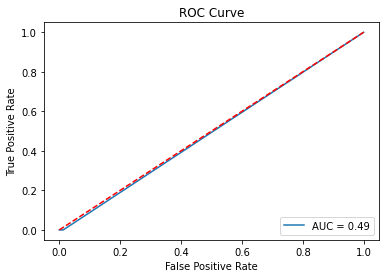

In [ ]:
y_pred = clf.predict(x_test)
# Compute ROC metrics:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Get AUC:
roc_auc = auc(fpr,tpr)

# Plot ROC:
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 上述的結果是 For imbalance dataset

In [ ]:
clf = GradientBoostingClassifier(random_state=0).fit(x_train_bal, y_train_bal)
clf.fit(x_train_bal, y_train_bal)

GradientBoostingClassifier(random_state=0)

In [ ]:
accu_scores = cross_val_score(clf, x_test, y_test, cv=10).mean()
f1_scores = cross_val_score(clf, x_test, y_test, cv=10, scoring='f1').mean()
recall_scores = cross_val_score(clf, x_test, y_test, cv=10, scoring='recall')
print("Accuracy mean:", accu_scores)
print("F1 mean:", f1_scores)
print("Recall mean:", recall_scores)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_

Accuracy mean: 0.975
F1 mean: 0.0
Recall mean: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


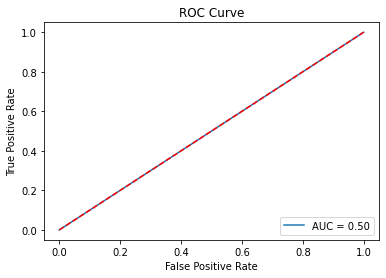

In [ ]:
y_pred = clf.predict(x_test)
# Compute ROC metrics:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Get AUC:
roc_auc = auc(fpr,tpr)

# Plot ROC:
plt.title('ROC Curve')
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 上述的結果是 For balance dataset

從上面兩種實驗的結果可以看出，不管 data 是否 balance 的結果都一樣，只有 balance dataset 的 AUC 多了 0.01，但是這完全可以當作誤差。

綜合以上幾種觀察我認為沒有單一模型可以直接處理這種 Imbalance 的情形，當然可能是資料的處理還不夠乾淨，或是 oversampling 的方式過於粗糙，但至少在有經過一不分前處理的情況下，這些模型仍無法大幅提高效能

# 2. (40%) Feature Selection


# 2-(a) 試使用線性迴歸以最小平方法估計迴歸係數，並說明重要變數(例如排序p-value或t統計量)。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.linear_model import LinearRegression
path = "/content/drive/MyDrive/台大/碩二上/MDS/HW3/MiningProcess_Flotation_Plant_Database.csv"
df = pd.read_csv(path)
df = df.replace(",", ".", regex=True) 
df

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.37,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.56,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.068,1.74,249.741,247.874,...,248.071,451.24,468.927,434.61,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.21,471.411,437.69,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.9,450.523,453.67,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,49.75,23.2,2710.94,441.052,386.57,9.62129,1.65365,302.344,298.786,...,313.695,392.16,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,2017-09-09 23:00:00,49.75,23.2,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,...,236.7,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,2017-09-09 23:00:00,49.75,23.2,2692.2,500.488,383.496,9.61874,1.65338,303.662,307.397,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.13,64.27,1.71
737451,2017-09-09 23:00:00,49.75,23.2,1164.12,491.548,384.976,9.61686,1.65324,302.55,301.959,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


In [ ]:
from sklearn.linear_model import LinearRegression
x = df.drop(["% Silica Concentrate", "date"], axis=1).astype(float)
y = df["% Silica Concentrate"].astype(float)
s_x = sm.add_constant(x)
model = sm.OLS(y, s_x).fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                             OLS Regression Results                             
Dep. Variable:     % Silica Concentrate   R-squared:                       0.679
Model:                              OLS   Adj. R-squared:                  0.679
Method:                   Least Squares   F-statistic:                 7.103e+04
Date:                  Fri, 04 Nov 2022   Prob (F-statistic):               0.00
Time:                          09:21:41   Log-Likelihood:            -7.1418e+05
No. Observations:                737453   AIC:                         1.428e+06
Df Residuals:                    737430   BIC:                         1.429e+06
Df Model:                            22                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [ ]:
# Sort the p-value
p_values = model.pvalues
sort_p = p_values.sort_values()
print(sort_p)
ranked_attr = sort_p.index[0:].drop(["const"])
print(len(ranked_attr), ranked_attr)

selected_attr = []
for index in sort_p.index.drop(["const"]):
  if sort_p[index] < 0.01:
    selected_attr.append(index)
print("Selected:", len(selected_attr), selected_attr)

const                            0.000000e+00
Flotation Column 05 Air Flow     0.000000e+00
Flotation Column 01 Air Flow     0.000000e+00
Ore Pulp Flow                    0.000000e+00
% Iron Concentrate               0.000000e+00
% Silica Feed                    0.000000e+00
% Iron Feed                      0.000000e+00
Amina Flow                       0.000000e+00
Flotation Column 01 Level       3.944836e-191
Flotation Column 02 Air Flow    1.243478e-168
Starch Flow                     6.175213e-141
Flotation Column 07 Air Flow    1.033036e-117
Ore Pulp pH                     1.308300e-103
Flotation Column 06 Level        5.407207e-76
Flotation Column 02 Level        1.157865e-68
Flotation Column 07 Level        6.922983e-44
Flotation Column 05 Level        1.844557e-34
Flotation Column 04 Level        5.702439e-31
Flotation Column 03 Level        6.435891e-30
Ore Pulp Density                 1.368629e-28
Flotation Column 03 Air Flow     3.178687e-24
Flotation Column 04 Air Flow     1

如上所示 : 依照 p-value 排序，並取出 p-valule < 0.01 的 Feature 可以得到以下結果

['Flotation Column 05 Air Flow', 'Flotation Column 01 Air Flow', 'Ore Pulp Flow', '% Iron Concentrate', '% Silica Feed', '% Iron Feed', 'Amina Flow', 'Flotation Column 01 Level', 'Flotation Column 02 Air Flow', 'Starch Flow', 'Flotation Column 07 Air Flow', 'Ore Pulp pH', 'Flotation Column 06 Level', 'Flotation Column 02 Level', 'Flotation Column 07 Level', 'Flotation Column 05 Level', 'Flotation Column 04 Level', 'Flotation Column 03 Level', 'Ore Pulp Density', 'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow']

重要程度由高至低，只有 "Flotation Column 06 Air Flow" 沒有選到

# 2-(b) 試使用逐步迴歸找出重要變數。

In [ ]:
def forward_regression(X, y, threshold_in=0.01, verbose=True):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

selected_Feature = forward_regression(x, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning

Add  Ore Pulp Density               with p-value 0.0


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

Add  Flotation Column 02 Air Flow   with p-value 0.0


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

Add  % Silica Feed                  with p-value 0.0


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

Add  Flotation Column 01 Air Flow   with p-value 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning

Add  Flotation Column 05 Air Flow   with p-value 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning

Add  Flotation Column 07 Air Flow   with p-value 0.0


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

Add  Starch Flow                    with p-value 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning

Add  Flotation Column 01 Level      with p-value 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning

Add  Amina Flow                     with p-value 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning

Add  Ore Pulp Flow                  with p-value 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning

Add  Flotation Column 06 Level      with p-value 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning

Add  Flotation Column 05 Level      with p-value 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning

Add  Flotation Column 06 Air Flow   with p-value 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning

Add  Flotation Column 03 Air Flow   with p-value 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning

Add  Ore Pulp pH                    with p-value 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning

Add  % Iron Concentrate             with p-value 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning

Add  % Iron Feed                    with p-value 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning

Add  Flotation Column 02 Level      with p-value 5.09439e-101


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning

Add  Flotation Column 07 Level      with p-value 2.51785e-35


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Add  Flotation Column 04 Level      with p-value 1.34722e-31


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Add  Flotation Column 03 Level      with p-value 1.37799e-28


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Add  Flotation Column 04 Air Flow   with p-value 1.61385e-09


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


In [ ]:
selected_Feature

['Ore Pulp Density',
 'Flotation Column 02 Air Flow',
 '% Silica Feed',
 'Flotation Column 01 Air Flow',
 'Flotation Column 05 Air Flow',
 'Flotation Column 07 Air Flow',
 'Starch Flow',
 'Flotation Column 01 Level',
 'Amina Flow',
 'Ore Pulp Flow',
 'Flotation Column 06 Level',
 'Flotation Column 05 Level',
 'Flotation Column 06 Air Flow',
 'Flotation Column 03 Air Flow',
 'Ore Pulp pH',
 '% Iron Concentrate',
 '% Iron Feed',
 'Flotation Column 02 Level',
 'Flotation Column 07 Level',
 'Flotation Column 04 Level',
 'Flotation Column 03 Level',
 'Flotation Column 04 Air Flow']

Ref: https://github.com/AakkashVijayakumar/stepwise-regression

我參考了這位作者的 Github 實作出了 forward step-wise regression 的挑選方法

這裡有一個比較重要的參數 "threshold_in" 代表要小於多少的 p-value 我才會做挑選，原作者並未特別定義，但我認為這個 p-value 應小於 0.01 才有顯著的重要性，因此在 Function 定義時便預設 0.01，最後選出的 Features 如下:

['Ore Pulp Density',
 'Flotation Column 02 Air Flow',
 '% Silica Feed',
 'Flotation Column 01 Air Flow',
 'Flotation Column 05 Air Flow',
 'Flotation Column 07 Air Flow',
 'Starch Flow',
 'Flotation Column 01 Level',
 'Amina Flow',
 'Ore Pulp Flow',
 'Flotation Column 06 Level',
 'Flotation Column 05 Level',
 'Flotation Column 06 Air Flow',
 'Flotation Column 03 Air Flow',
 'Ore Pulp pH',
 '% Iron Concentrate',
 '% Iron Feed',
 'Flotation Column 02 Level',
 'Flotation Column 07 Level',
 'Flotation Column 04 Level',
 'Flotation Column 03 Level',
 'Flotation Column 04 Air Flow']


# 2-(c) 試比較(a)與(b)的結果是否一致？有何不同？

結果幾乎一致，只是 step-wise 的部分多選了一個 Feature "Flotation Column 06 Air Flow" 而 Linear regression 沒有選擇。

這可能是因為 forward step-wise 是一個一個加入 Feature 再計算 p-value，而 Feature "Flotation Column 06 Air Flow" 計算時剛好 < 0.01 就被選進去了，這是十分有機會的，因為在 linear regression 中它也十分接近 0.01，都是 10^-2 等級的數值

# 2-(d) 試使用脊迴歸挑選重要變數。

In [ ]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
selector = SelectFromModel(Ridge())
selector.fit(x, y)
selected_features = selector.get_support()
print("coef:", selector.estimator_.coef_)

selected_features = x.columns[selected_features]
print("Selected Feature:",len(selected_features), selected_features)


coef: [ 2.55903337e-02  2.88444413e-02 -1.73563127e-05  6.82860538e-04
  4.22754852e-03  4.59629631e-02  1.69695529e-01 -5.13776814e-03
 -1.42156749e-03 -9.81413805e-04  2.25616177e-03  1.46191171e-02
 -8.53449659e-05  1.23520426e-03 -2.85262246e-04 -1.55833014e-04
 -8.72626905e-05 -1.34605988e-04 -1.77686616e-04 -2.05340963e-04
  1.90397747e-04 -7.87109744e-01]
Selected Feature: 2 Index(['Ore Pulp Density', '% Iron Concentrate'], dtype='object')


Ref: https://medium.com/@sabarirajan.kumarappan/feature-selection-by-lasso-and-ridge-regression-python-code-examples-1e8ab451b94b

使用 sklearn 的 SelectFromModel 來進行 Feature Seleciton，並將 Model 設定為 Ridge Regression

從上面的結果可看出，最終挑選了 ['Ore Pulp Density', '% Iron Concentrate'] 這兩個 Feature，挑選數量比前面少很多，因為其實這裡有一個參數 threshold 可以自己設定，若想要挑選更多 Feature 可以使用以下策略 : 

1. 首先一樣先用 default 選出 Feature
2. 如果 Feature 數太少再逐步調整 Threshold，直到取得自己想要的 Feature

因為 Feature 會根據使用情形而不同，這裡僅用最中立的 Default 值代表

# 2-(e) 試使用套索迴歸或適應性套索迴歸挑選重要變數。

In [ ]:
selector = SelectFromModel(Lasso())
selector.fit(x, y)
selected_features = selector.get_support()
print("coef:", selector.estimator_.coef_)

selected_features = x.columns[selected_features]
print("Selected Feature:",len(selected_features) , selected_features)

coef: [-0.00000000e+00  0.00000000e+00 -6.85383038e-05  1.93270785e-03
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -6.96096749e-03
 -0.00000000e+00 -1.66382483e-03  0.00000000e+00 -0.00000000e+00
  1.03975158e-03  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  4.71856604e-05 -4.20905107e-04 -1.24211064e-03 -0.00000000e+00
 -5.03653401e-04 -0.00000000e+00]
Selected Feature: 9 Index(['Starch Flow', 'Amina Flow', 'Flotation Column 01 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 03 Level', 'Flotation Column 04 Level',
       'Flotation Column 05 Level', 'Flotation Column 07 Level'],
      dtype='object')


Ref: https://medium.com/@sabarirajan.kumarappan/feature-selection-by-lasso-and-ridge-regression-python-code-examples-1e8ab451b94b

使用 sklearn 的 SelectFromModel 來進行 Feature Seleciton，並將 Model 設定為 Lasso Regression

從上面的結果可以看出，總共挑選出 ['Starch Flow', 'Amina Flow', 'Flotation Column 01 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 03 Level', 'Flotation Column 04 Level',
       'Flotation Column 05 Level', 'Flotation Column 07 Level'] 共 9 個 Feature

Note : 這裡 threhold 一樣使用 default 值

# 2-(f) 試比較(d)與(e)的結果是否一致？有何不同？

兩者的結果相當不同，完全沒有重複的部分。套索迴歸選出了較多的 Feature，脊迴歸責只選出 2 個 Feature。

這兩種方式選出的 Feature 其實比 (a)、(b) 的方法都少很多，而且沒有重複性，或許可以將這兩個方法選取的 Feature 組合起來，當作最後的篩選結果

# 2-(g) 在特徵中那些特徵彼此之間高相關？若以線性迴歸預測，請問是否有共線性的問題？

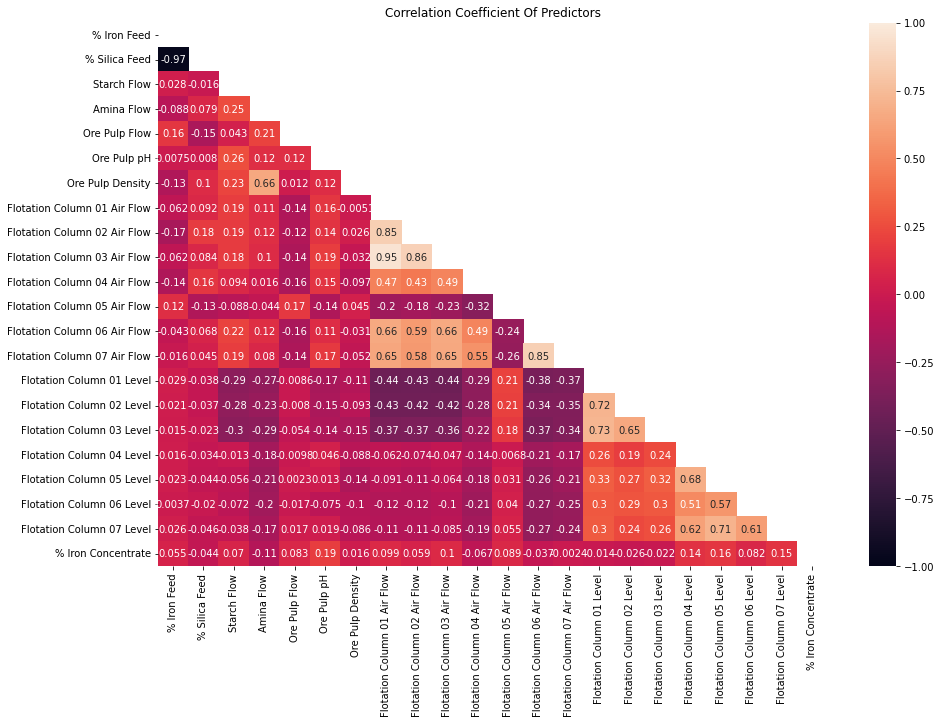

In [ ]:
# set figure size
plt.figure(figsize=(15,10))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(x.corr(), dtype=bool))

sns.heatmap(x.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

Ref : https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b

由上圖可看出部分 Feature 之間的確有高度的相關性 (越接近-1 or 1)

舉例來說 (在此定義高度相關: >0.9 or < -0.9): 

"% Silica Feed" 和 "% Iron Feed" = -0.97

"Flotation Column 03 Air flow" 和 "Flotation Column 01 Air flow" = 0.95

因為從圖中可以看出 Feature 之間有強烈的關聯性，所以線性回歸來說會有共線性的問題

# 2-(h) 是否可用含鐵濃度百分比來建模預測含二氧化矽濃度百分比？為什麼？可能有什麼潛在問題？如何解決？

如果單就模型的預測來說，用含鐵濃度百分比來建模預測含二氧化矽濃度百分比是可行的，畢竟就是把這些數據丟進 Model 裡面進行預測；但就實際現場的情形可能就不適合這樣做。

因為通過浮選漕篩選到最後產生出 "含鐵濃度百分比" 以及 "含二氧化矽濃度百分比"，時間上是非常相近的，也就是說當我拿到 "含鐵濃度百分比" 想要進行 "含二氧化矽濃度百分比" 的預測時，可能 "含二氧化矽濃度百分比" 的數值也就出來了，根本不需要預測。

比較可行的解決方案是，不要使用同一階段的 "含鐵濃度百分比" 來預測 "含二氧化矽濃度百分比"，而是可以使用可能過去 10 個 timestamp 的資料，來預測下一個 timestamp 的 "含二氧化矽濃度百分比"

# 3. (20%) Deep Learning

In [ ]:
# Import需要的套件
import os
import numpy as np
import cv2
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import pandas as pd
from torch.utils.data import DataLoader, Dataset
import time

# 3-(a) (15%) For BPN (or CNN if you prefer), try to investigate the effects of changing “PARAMETERS” such as learning rates, momentum, # of hidden/convolutional layers, dropout rate, etc. Show the numerical results and “DIAGRAM” from different perspectives (e.g., MSE/accuracy, F1 score, convergence time, error of training data, error of testing data, etc.). Please show all your work in detail, in particular, you “MAY” need to design your experiments with different parameters systematically.

In [ ]:
# Data load
path = "./MDS_Assignment3_DRtraining.xlsx"
df_train = pd.read_excel(path, sheet_name="training", index_col=0)
path = "./MDS_Assignment3_DRpredict.xlsx"
df_valid = pd.read_excel(path, sheet_name="Predict", index_col=0)

In [ ]:
x_train = df_train.iloc[:,0:256].values
y_train = df_train.iloc[:,256:].values
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (1578, 256)
y_train shape: (1578, 10)


In [ ]:
x_valid = df_valid.iloc[:,0:256].values
y_valid = df_valid.iloc[:,256:].values
print("x_valid shape:", x_valid.shape)
print("y_valid shape:", y_valid.shape)

x_valid shape: (15, 256)
y_valid shape: (15, 10)


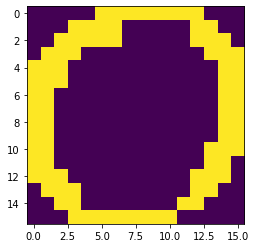

In [ ]:
plt.imshow(x_train[1].reshape(16,16))

In [ ]:
x_train = x_train.reshape(-1, 16, 16, 1)
y_train = y_train.reshape(-1, 10)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (1578, 16, 16, 1)
y_train shape: (1578, 10)


In [ ]:
x_valid = x_valid.reshape(-1, 16, 16, 1)
y_valid = y_valid.reshape(-1, 10)
print("x_valid shape:", x_valid.shape)
print("y_valid shape:", y_valid.shape)

x_valid shape: (15, 16, 16, 1)
y_valid shape: (15, 10)


In [ ]:
from torch.utils.data import DataLoader, Dataset
class ImgDataset(Dataset):
    def __init__(self, x, y=None):
        self.x = torch.FloatTensor(x).permute(0,3,1,2)
        if(y is not None):
          self.y = torch.FloatTensor(y)
        else:
          self.y = None
        # self.x = x
        # self.y = y

    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        if(self.y is not None):
          return self.x[idx], self.y[idx]
        else:
          return self.x[idx]


In [ ]:
batch_size = 16
x_train_set = ImgDataset(x_train, y_train)
x_train_loader = DataLoader(x_train_set, batch_size=batch_size, shuffle=True)
x_valid_set = ImgDataset(x_valid, y_valid)
x_valid_loader = DataLoader(x_valid_set, batch_size=batch_size, shuffle=False)

In [ ]:
for data in x_valid_loader:
  print(data[0].shape)
  print(data[1].shape)
  break

torch.Size([15, 1, 16, 16])
torch.Size([15, 10])


In [ ]:
class CNN(nn.Module):
    def __init__(self, feature_size):
        super(CNN, self).__init__()
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding) # out_channels就是filter size
        # torch.nn.MaxPool2d(kernel_size, stride, padding)
        # input 維度 [圖片通道數, 長, 寬]
        self.cnn = nn.Sequential(
            nn.Conv2d(feature_size, 64, 3, 1, 1),  # [64, 16, 16]
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, 1, 1), # [64, 16, 16]
            nn.BatchNorm2d(64),
            nn.ReLU(),
            # nn.MaxPool2d(2, 2, 0),      # [64, 8, 8]

            # nn.Conv2d(64, 128, 3, 1, 1), # [128, 8, 8]
            # nn.BatchNorm2d(128),
            # nn.ReLU(),
            # nn.Conv2d(128, 256, 3, 1, 1), # [256, 8, 8]
            # nn.BatchNorm2d(256),
            # nn.ReLU(),
            # nn.MaxPool2d(2, 2, 0),       # [256, 4, 4]

        )
        self.fc = nn.Sequential(
            nn.Linear(64*16*16, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        out = self.cnn(x)
        out = out.view(out.size()[0], -1) # 好像就是flatting
        return self.fc(out)

In [ ]:
len(x_train)

1578

In [ ]:
# CNN for 化合物
model= CNN(feature_size=x_train.shape[3]).cuda() # cuda()代表放進GPU裡面準備使用
loss = nn.MSELoss()  # 因為是 classification task，所以 loss 使用 CrossEntropyLoss # CrossEntropyLoss有自動幫我們使用softmax了
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # optimizer 使用 Adam
num_epoch = 1000

best_val_loss = 1000

for epoch in range(num_epoch):

    train_acc = 0.0
    val_acc = 0.0

    train_loss = 0.0
    val_loss = 0.0

    train_updata_times = 0
    val_updata_times = 0


    model.train() # 確保 model 是在 train mode (開啟 Dropout 等...)
    for i, data in enumerate(x_train_loader):
        optimizer.zero_grad() # 用 optimizer 將 model 參數的 gradient 歸零
        train_pred = model(data[0].cuda()) # 利用 model 得到預測的機率分佈 這邊實際上就是去呼叫 model 的 forward 函數 # data.cuda()將記憶體中的數據放到GPU的顯存上，因為batch = 128，所以有128個預測結果，shape=(128,共有幾類)
        batch_loss = loss(train_pred, data[1].cuda()) # 計算 loss （注意 prediction 跟 label 必須同時在 CPU 或是 GPU 上）
        batch_loss.backward() # 利用 back propagation 算出每個參數的 gradient
        optimizer.step() # 以 optimizer 用 gradient 更新參數值

        train_acc += np.sum(np.argmax(train_pred.cpu().data.numpy(), axis=1) == data[1].numpy()) # np.argmax(train_pred.cpu().data.numpy(), axis=1)會選出每次預測中機率最高的，然後跟data[1]對比，看有幾個正確
        train_loss += batch_loss.item() #.item()可以取得loss值
        train_updata_times += 1 

        # for pred in train_pred:
        #   all_train_pred.append(pred.detach().cpu().numpy().tolist())
    
    model.eval() # 從 train mode 轉成 eval mode
    with torch.no_grad():
        for i, data in enumerate(x_valid_loader):
            val_pred = model(data[0].cuda())
            batch_loss = loss(val_pred, data[1].cuda())

            val_acc += np.sum(np.argmax(val_pred.cpu().data.numpy(), axis=1) == data[1].numpy())
            val_loss += batch_loss.item()
            val_updata_times += 1

            # for pred in val_pred:
            #   all_val_pred.append(pred.detach().cpu().numpy().tolist())

        # save weight
        temp_best_loss = val_loss/val_updata_times
        if(temp_best_loss < best_val_loss):
          best_val_loss = temp_best_loss
          torch.save(model.state_dict(), "weight.pt")

        #將結果 print 出來
        print("Epoch:", str(epoch+1)+"/"+str(num_epoch), "Train loss:", train_loss/train_updata_times, "Val loss:", val_loss/val_updata_times
              , "Train accu:", train_acc/len(x_train), "Val aacu:", val_acc/len(x_valid))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Epoch: 1/1000 Train loss: 0.04732410411228134 Val loss: nan Train accu: 0.010773130544993664 Val aacu: 0.0
Epoch: 2/1000 Train loss: 0.009348494616910966 Val loss: nan Train accu: 0.010773130544993664 Val aacu: 0.0
Epoch: 3/1000 Train loss: 0.0038757306192013802 Val loss: nan Train accu: 0.0063371356147021544 Val aacu: 0.0
Epoch: 4/1000 Train loss: 0.0015455484207992376 Val loss: nan Train accu: 0.0 Val aacu: 0.0
Epoch: 5/1000 Train loss: 0.0007189309795979749 Val loss: nan Train accu: 0.0063371356147021544 Val aacu: 0.0
Epoch: 6/1000 Train loss: 0.0004258158985958105 Val loss: nan Train accu: 0.005703422053231939 Val aacu: 0.0
Epoch: 7/1000 Train loss: 0.0003323874968713187 Val loss: nan Train accu: 0.0006337135614702154 Val aacu: 0.0
Epoch: 8/1000 Train loss: 0.00023868248719754957 Val loss: nan Train accu: 0.00697084917617237 Val aacu: 0.0
Epoch: 9/1000 Train loss: 0.00024417242086127944 Val loss: nan Train accu: 0.011406844106463879 Val aacu: 0.0
Epoch: 10/1000 Train loss: 0.000203

KeyboardInterrupt: ignored

In [ ]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding) # out_channels就是filter size
        # torch.nn.MaxPool2d(kernel_size, stride, padding)
        # input 維度 [3, 128, 128]
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 64, 3, 1, 1),  # [64, 128=(128-3+1+2), 128=(128-3+1+2)]   # output = 128 - kernel_size + 1 + padding(上下左右都padding)
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),      # [64, 64, 64]

            nn.Conv2d(64, 128, 3, 1, 1), # [128, 64, 64]
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),      # [128, 32, 32]

            nn.Conv2d(128, 256, 3, 1, 1), # [256, 32, 32]
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),      # [256, 16, 16]

            nn.Conv2d(256, 512, 3, 1, 1), # [512, 16, 16]
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),       # [512, 8, 8]
            
            nn.Conv2d(512, 512, 3, 1, 1), # [512, 8, 8]
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),       # [512, 4, 4]
        )
        self.fc = nn.Sequential(
            nn.Linear(512*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 11)
        )

    def forward(self, x):
        out = self.cnn(x)
        out = out.view(out.size()[0], -1) # 好像就是flatting
        return self.fc(out)

# 3-(b) (5%) Please predict the digit No.1579 to No.1593 (data source: MDS_Assignment3_ DRpredict.xlsx) using your best established BPN/CNN model in (a) and fill out the following table.